<a href="https://colab.research.google.com/github/Swatantraraj19/Soil-Analysis-and-Prediction-Using-Machine-Learning-and-VNIR-Spectroscopy-Data/blob/main/Project_Polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [22]:
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Soil Analysis Project/ngp_dataset_copy.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-22-2f27bf6325f6>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Soil Analysis Project/ngp_dataset_copy.csv")


In [23]:
data.head()

,SSN,phExtract,Ec Extract,CaCO3 equivalent %,oc,350,351,352,353,354,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,S1,9.71,8.60,2.13,0.10,0.046108,0.045455,0.047377,0.047641,0.047244,...,0.361984,0.362534,0.367887,0.373615,0.372376,0.368952,0.369218,0.369831,0.368443,0.366677
1,S2,9.31,10.98,2.00,0.16,0.058354,0.056818,0.060466,0.059517,0.056903,...,0.432295,0.431881,0.432052,0.431516,0.430653,0.429207,0.428507,0.427753,0.427360,0.428772
2,S3,10.06,11.40,4.63,0.33,0.054272,0.053030,0.054444,0.054254,0.053800,...,0.383106,0.380261,0.384512,0.392465,0.392107,0.386532,0.382463,0.379579,0.381684,0.384766
3,S4,9.69,7.54,9.13,0.30,0.057146,0.053030,0.054444,0.052904,0.050697,...,0.396354,0.390753,0.391703,0.395259,0.397433,0.400544,0.401183,0.399556,0.398051,0.395273
4,S5,9.75,5.16,12.63,0.25,0.063643,0.064394,0.067533,0.067480,0.066212,...,0.462253,0.463458,0.463963,0.463574,0.464622,0.465143,0.461718,0.457439,0.456462,0.456705


In [24]:
X = data.iloc[:119, 5:].values  # Features (spectroscopy data)
y = data.iloc[:119, 4].values   # Target variable (Soil Organic Carbon)

In [25]:
a = np.array(y)
len(a)

119

In [26]:

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()  # Create a StandardScaler object
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the fitted scaler


# Polynomial features
degree = 2  # Degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

In [27]:
# Train Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_scaled)

LinearRegression()

In [28]:
# Predict SOC for test set
y_pred_scaled = poly_reg.predict(X_test_poly)
y_pred = sc_y.inverse_transform(y_pred_scaled)

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.028092519102168003


In [31]:
import math # Import the math module

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = math.sqrt(mse) # Now math.sqrt is accessible
print("Root Mean Squared Value:", rmse)

Mean Squared Error: 0.028092519102168003
Root Mean Squared Value: 0.16760823100960168


In [33]:
from sklearn.metrics import r2_score # Import the r2_score function

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: -0.28979809677088153


In [35]:
from sklearn.metrics import mean_absolute_error # Import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.11714409819002918


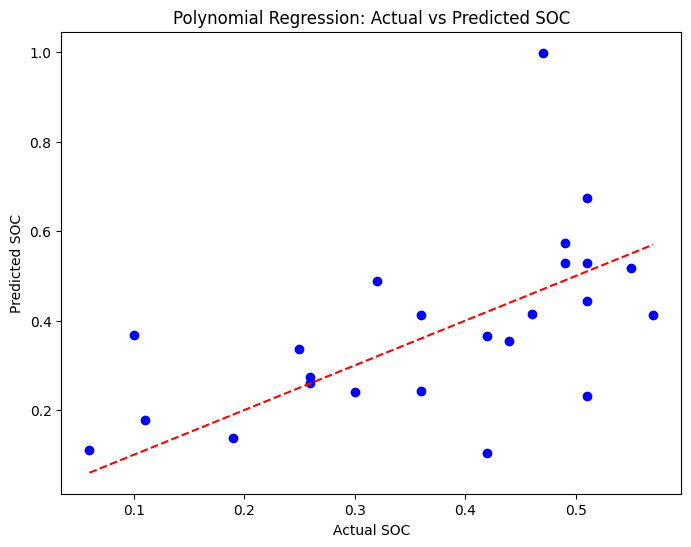

In [36]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted SOC values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual SOC')
plt.ylabel('Predicted SOC')
plt.title('Polynomial Regression: Actual vs Predicted SOC')
plt.show()